In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [381]:
auction_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/train_set_label.csv" )

In [382]:
auction_data.head(60)

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,1644594033,493.00,6.999456,boraborabora,67,9.99,498.00
1,1639309309,30.00,1.669618,aclbjc,0,1.00,374.99
2,1644109746,3103.00,6.917986,nelsoncpm,7,1.00,3103.00
3,1649858595,175.00,3.107014,pialu9,4,7.99,202.50
4,1647846714,226.00,2.721319,geemeetee@aol.com,17,1.00,905.45
5,1644760539,50.00,2.481134,darbarskip,1,1.00,327.23
6,1644739924,455.00,6.591678,dollfacepumpkin,10,1.00,455.00
7,1648041601,251.50,5.727454,bogdanbost,1,1.00,335.00
8,1644357387,50.00,0.328600,bdonahue9@aol.com,22,1.00,640.00
9,1644077820,200.00,0.322894,msvail,0,1.00,374.00


In [383]:
auction_data.shape

(1213, 7)

In [384]:
auction_data.isnull().any()

auctionid     False
bid           False
bidtime       False
bidder        False
bidderrate    False
openbid       False
price         False
dtype: bool

In [385]:
auction_data.dtypes

auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
price         float64
dtype: object

In [386]:
#x=[]
#for a,b in zip(auction_data.bid,auction_data.price):
    #if a==b:
      #  x.append(1)
#    else:
   #     x.append(0)

In [387]:
# New feature of whether final price equaled proxy bid
#auction_data['bid_tr']=pd.DataFrame(x)
#auction_data.head()

In [388]:
import re
y=[]
for n in auction_data['bidder']:
    try:
        result=(re.search('@(.*).',n))
        y.append(result.group(1))
    except:
        continue
y=list(set(y))
del(y[-6])

In [389]:
# List of the websites of the email ids of the bidders
y

['earthlink.ne',
 'verizon.ne',
 'aol.co',
 'msn.co',
 'tampabay.rr.co',
 'webtv.co',
 'shadow.ne',
 'amexol.ne',
 'columbia.ed',
 'stargate.ne',
 'elliman.co',
 'scottsbluff.n',
 'btconnect.co',
 'northlink.co',
 'ucnsb.ne',
 'purplepicket.co',
 'netzero.n',
 'prodigy.ne',
 'erols.co',
 'mediaone.ne',
 'wxs.n',
 'hotmail.co',
 'mac.co',
 'cs.co',
 'wellsref.co',
 'slk.co',
 'ti.co',
 'home.co',
 'easytel.ne',
 'excite.co',
 'altavis',
 'disnow.co',
 'calcsea.or',
 'mcdata.co',
 'bellsouth.ne',
 'san.rr.co',
 'dechert.co',
 'yahoo.co',
 'mindspring.co']

In [390]:
# Adding email website of the bidders

for e in y:
    auction_data[e]=auction_data['bidder'].apply(lambda x:1 if e in x else 0)
auction_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,...,excite.co,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co
0,1644594033,493.0,6.999456,boraborabora,67,9.99,498.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1639309309,30.0,1.669618,aclbjc,0,1.00,374.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1644109746,3103.0,6.917986,nelsoncpm,7,1.00,3103.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1649858595,175.0,3.107014,pialu9,4,7.99,202.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1647846714,226.0,2.721319,geemeetee@aol.com,17,1.00,905.45,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [391]:
# Removing email ids from bidder's name
auction_data['bidder']=auction_data['bidder'].apply(lambda x:x.split('@')[0] if '@' in x else x)
auction_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,...,excite.co,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co
0,1644594033,493.0,6.999456,boraborabora,67,9.99,498.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1639309309,30.0,1.669618,aclbjc,0,1.00,374.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1644109746,3103.0,6.917986,nelsoncpm,7,1.00,3103.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1649858595,175.0,3.107014,pialu9,4,7.99,202.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1647846714,226.0,2.721319,geemeetee,17,1.00,905.45,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [392]:
# New feature of user name length
auction_data['user_len']=auction_data['bidder'].apply(lambda x:len(x))
auction_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
0,1644594033,493.0,6.999456,boraborabora,67,9.99,498.00,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,1639309309,30.0,1.669618,aclbjc,0,1.00,374.99,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1644109746,3103.0,6.917986,nelsoncpm,7,1.00,3103.00,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,1649858595,175.0,3.107014,pialu9,4,7.99,202.50,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,1647846714,226.0,2.721319,geemeetee,17,1.00,905.45,0,0,1,...,0,0,0,0,0,0,0,0,0,9


In [393]:
# EXPLORATORY DATA ANALYSIS
auction_data.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,msn.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
count,1.213000e+03,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,1.644577e+09,647.652539,4.078951,31.807914,159.142852,1010.246076,0.003298,0.004946,0.050289,0.006595,...,0.003298,0.000824,0.004122,0.000824,0.001649,0.004946,0.000824,0.004122,0.003298,8.889530
std,3.566101e+06,701.003386,2.505148,79.112571,388.456626,832.676139,0.057354,0.070186,0.218630,0.080976,...,0.057354,0.028712,0.064097,0.028712,0.040589,0.070186,0.028712,0.064097,0.057354,2.805169
min,1.638844e+09,1.000000,0.007535,-4.000000,0.010000,103.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.641784e+09,161.000000,1.578866,1.000000,1.000000,374.990000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,1.644139e+09,400.000000,4.302025,5.000000,7.990000,680.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,1.647847e+09,895.000000,6.777083,30.000000,175.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
max,1.650986e+09,5400.000000,6.999965,1303.000000,5000.000000,5400.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000


In [394]:
# Removing outliers which are far above the mean
auction_data=auction_data[auction_data['bidderrate']<400]
auction_data.shape

(1206, 47)

In [395]:
auction_data=auction_data[auction_data['bid']<4000]
auction_data.shape

(1202, 47)

In [396]:
len(auction_data[auction_data['openbid']<2000])

1202

In [399]:
auction_data['earthlink.ne'].value_counts()

0    1198
1       4
Name: earthlink.ne, dtype: int64

In [400]:
auction_data['hotmail.co'].value_counts()

0    1191
1      11
Name: hotmail.co, dtype: int64

In [401]:
auction_data['yahoo.co'].value_counts()

0    1197
1       5
Name: yahoo.co, dtype: int64

In [402]:
auction_data['scottsbluff.n'].value_counts()

0    1201
1       1
Name: scottsbluff.n, dtype: int64

In [403]:
df=auction_data

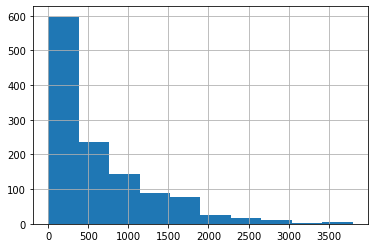

In [404]:
df.bid.hist()

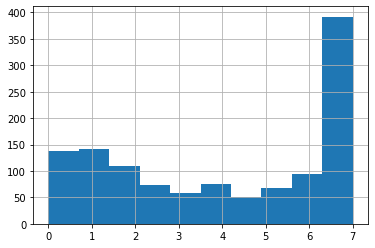

In [405]:
df.bidtime.hist()

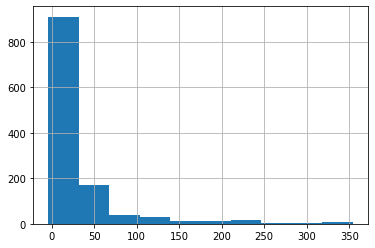

In [406]:
df.bidderrate.hist()

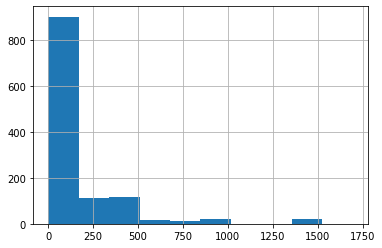

In [407]:
df.openbid.hist()

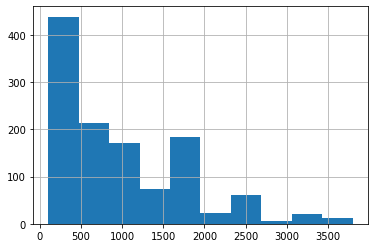

In [408]:
df.price.hist()

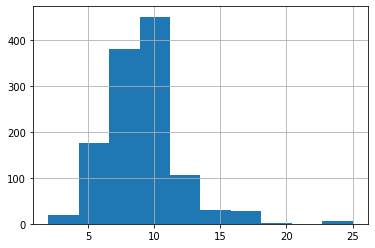

In [409]:
df.user_len.hist()

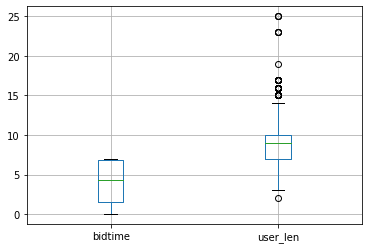

In [410]:
df.boxplot(column=['bidtime','user_len'])

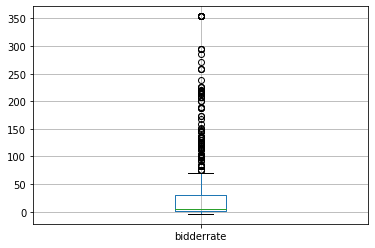

In [411]:
df.boxplot(column=['bidderrate'])

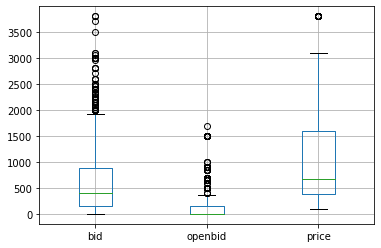

In [412]:
df.boxplot(column=['bid','openbid','price'])

In [414]:
# Visualizing categorical variables
df_cat=df[[ 'earthlink.ne', 'verizon.ne', 'aol.co', 'msn.co',
       'tampabay.rr.co', 'webtv.co', 'shadow.ne', 'amexol.ne', 'columbia.ed',
       'stargate.ne', 'elliman.co', 'scottsbluff.n', 'btconnect.co',
       'northlink.co', 'ucnsb.ne', 'purplepicket.co', 'netzero.n',
       'prodigy.ne', 'erols.co', 'mediaone.ne', 'wxs.n', 'hotmail.co',
       'mac.co', 'cs.co', 'wellsref.co', 'slk.co', 'ti.co', 'home.co',
       'easytel.ne', 'excite.co', 'altavis', 'disnow.co', 'calcsea.or',
       'mcdata.co', 'bellsouth.ne', 'san.rr.co', 'dechert.co', 'yahoo.co',
       'mindspring.co']]

graph forearthlink.ne :total=2


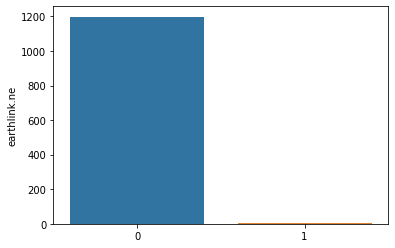

graph forverizon.ne :total=2


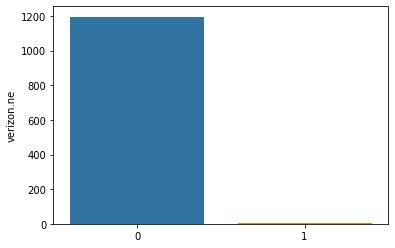

graph foraol.co :total=2


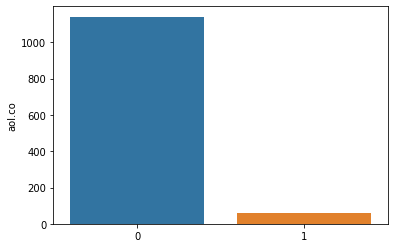

graph formsn.co :total=2


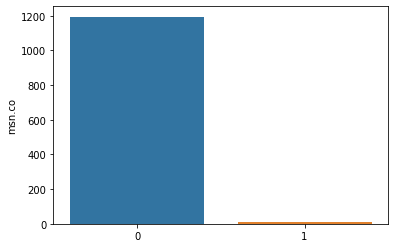

graph fortampabay.rr.co :total=2


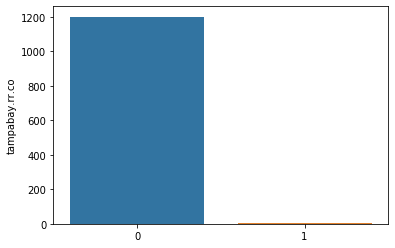

graph forwebtv.co :total=1


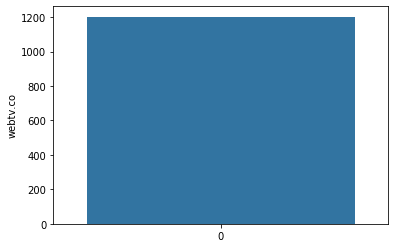

graph forshadow.ne :total=2


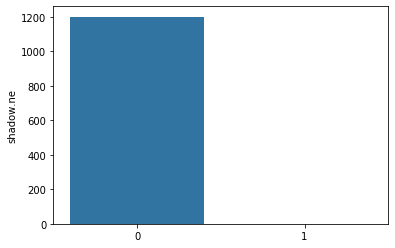

graph foramexol.ne :total=2


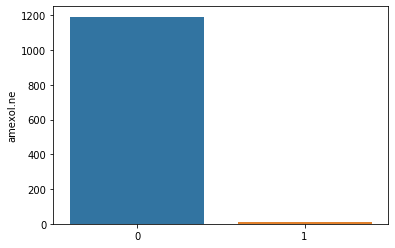

graph forcolumbia.ed :total=2


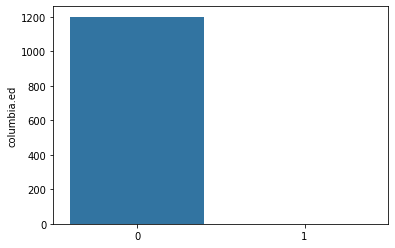

graph forstargate.ne :total=2


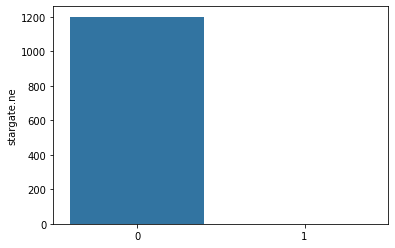

graph forelliman.co :total=2


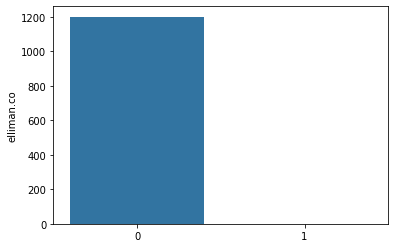

graph forscottsbluff.n :total=2


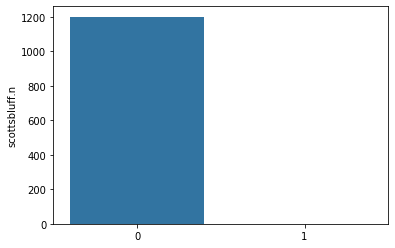

graph forbtconnect.co :total=2


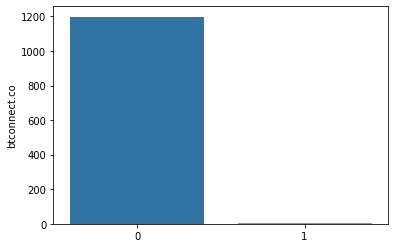

graph fornorthlink.co :total=2


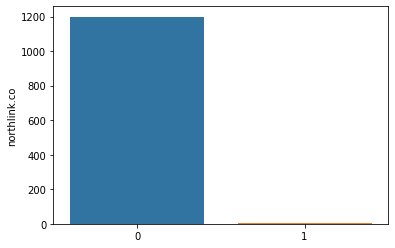

graph forucnsb.ne :total=2


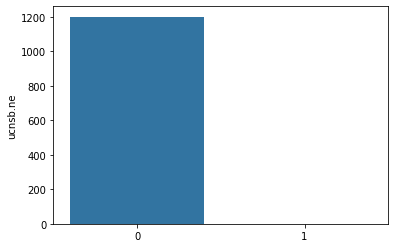

graph forpurplepicket.co :total=2


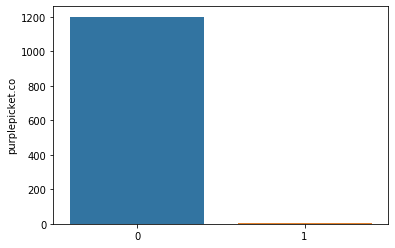

graph fornetzero.n :total=2


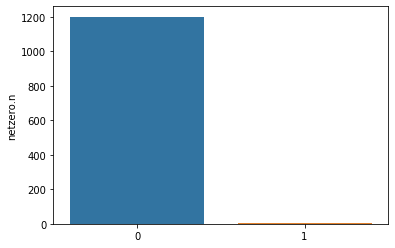

graph forprodigy.ne :total=2


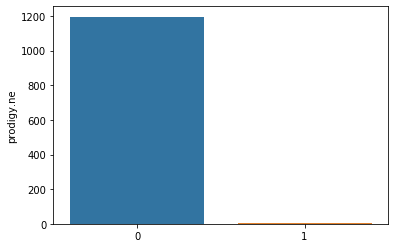

graph forerols.co :total=2


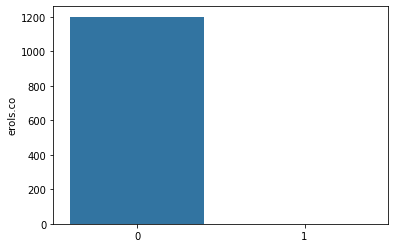

graph formediaone.ne :total=2


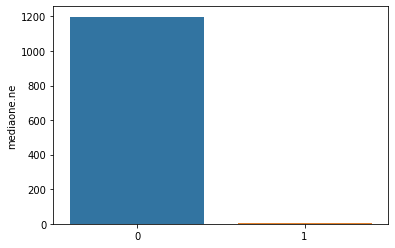

graph forwxs.n :total=2


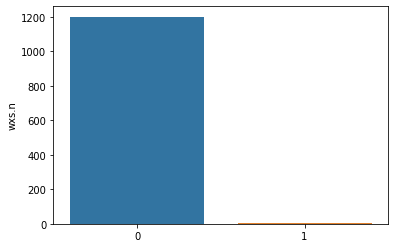

graph forhotmail.co :total=2


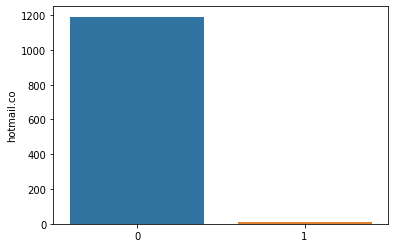

graph formac.co :total=2


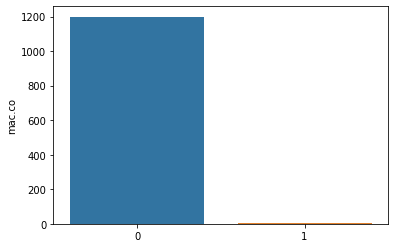

graph forcs.co :total=2


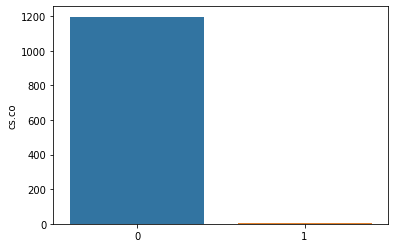

graph forwellsref.co :total=2


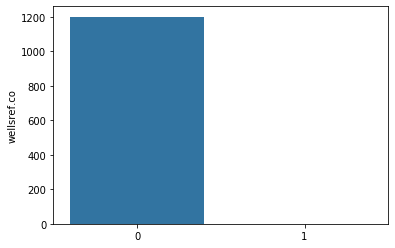

graph forslk.co :total=2


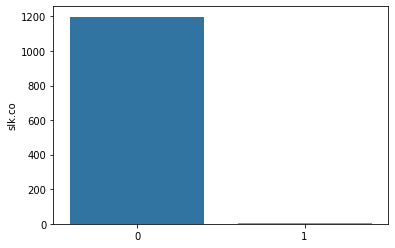

graph forti.co :total=2


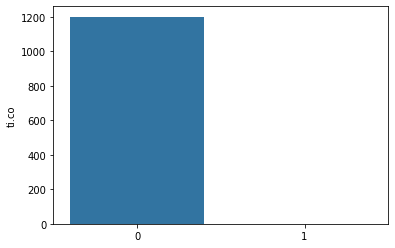

graph forhome.co :total=2


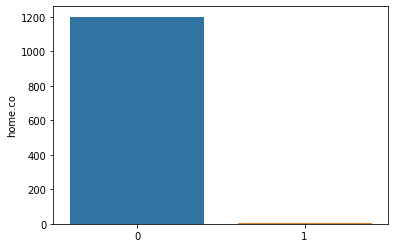

graph foreasytel.ne :total=2


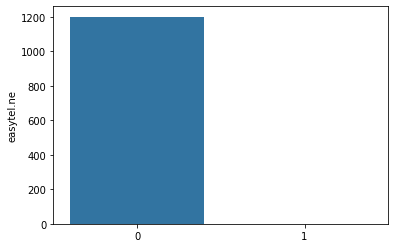

graph forexcite.co :total=2


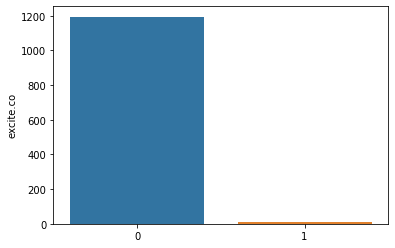

graph foraltavis :total=2


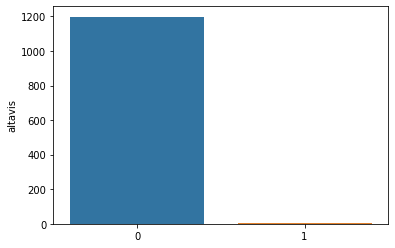

graph fordisnow.co :total=2


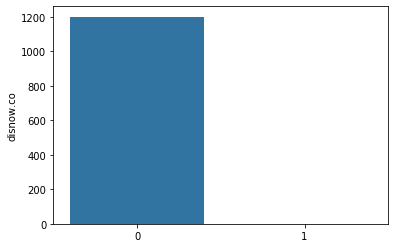

graph forcalcsea.or :total=2


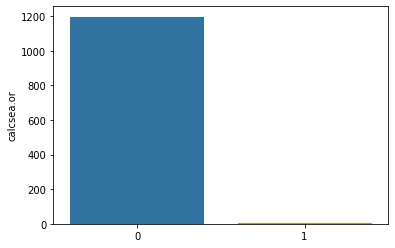

graph formcdata.co :total=2


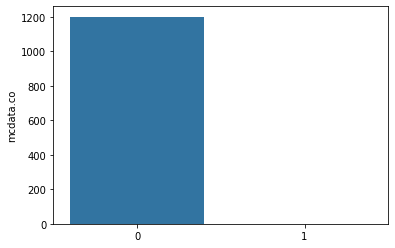

graph forbellsouth.ne :total=2


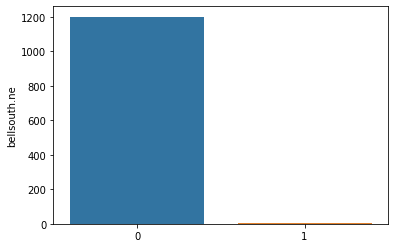

graph forsan.rr.co :total=2


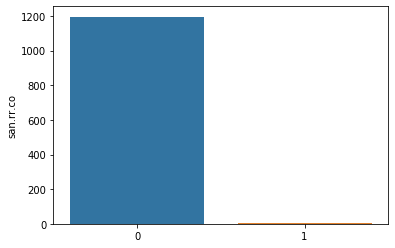

graph fordechert.co :total=2


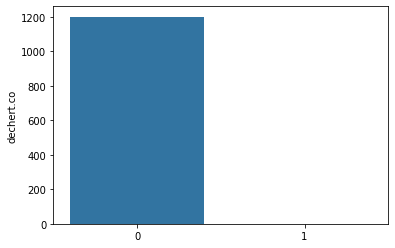

graph foryahoo.co :total=2


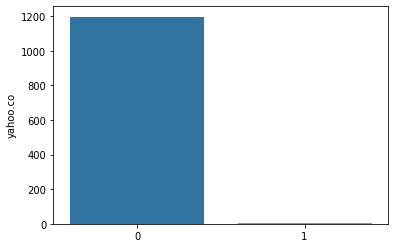

graph formindspring.co :total=2


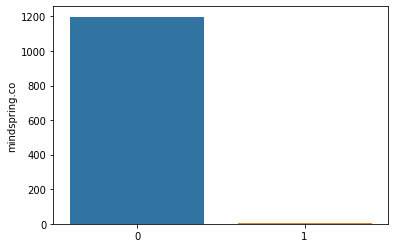

In [415]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print('graph for%s :total=%d'%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

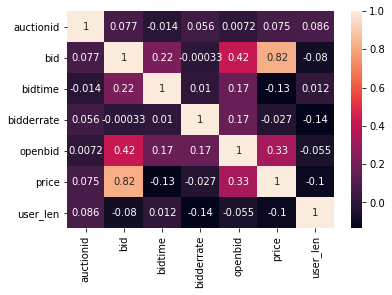

In [416]:
corr_col=df[['auctionid', 'bid', 'bidtime', 'bidder', 'bidderrate', 'openbid','price','user_len']]
sns.heatmap(corr_col.corr(),annot=True)

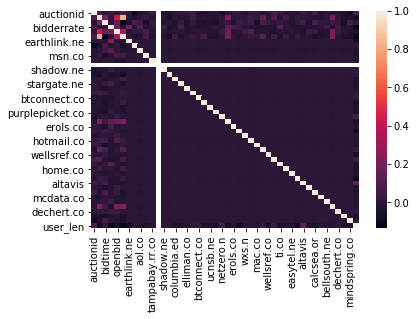

In [417]:
sns.heatmap(df.corr())

In [418]:
df.corr()

,auctionid,bid,bidtime,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,msn.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
auctionid,1.000000,0.076822,-0.014198,0.055943,0.007248,0.075352,-0.003671,-0.114566,-0.025450,-0.012382,...,0.059326,-0.010992,0.071629,-0.046081,-0.002779,-0.011001,-0.016907,-0.050289,-0.085403,0.085795
bid,0.076822,1.000000,0.218780,-0.000327,0.423217,0.818606,-0.010693,-0.038867,-0.001855,0.035874,...,-0.000635,-0.005707,-0.023459,-0.023214,0.000497,0.220649,0.017502,-0.041519,-0.040120,-0.080043
bidtime,-0.014198,0.218780,1.000000,0.010255,0.170795,-0.129658,-0.022537,0.078114,0.047179,-0.058980,...,0.055179,-0.040906,0.073073,0.019310,0.010475,0.044103,0.022269,-0.057628,0.067610,0.012224
bidderrate,0.055943,-0.000327,0.010255,1.000000,0.169046,-0.026945,0.210440,-0.012912,0.104688,-0.015498,...,-0.024633,-0.011760,-0.012995,0.002863,0.064584,-0.032853,0.047274,-0.025611,-0.006196,-0.135771
openbid,0.007248,0.423217,0.170795,0.169046,1.000000,0.331437,-0.025269,0.021292,0.018171,0.070586,...,-0.030266,0.037773,0.025232,-0.012565,-0.021384,0.197250,0.037879,-0.006451,-0.029418,-0.054601
price,0.075352,0.818606,-0.129658,-0.026945,0.331437,1.000000,-0.007418,-0.060411,-0.014592,0.063929,...,-0.023091,0.001004,-0.041550,-0.027972,-0.018371,0.249951,0.001004,-0.046384,-0.053903,-0.103759
earthlink.ne,-0.003671,-0.010693,-0.022537,0.210440,-0.025269,-0.007418,1.000000,-0.004093,-0.013361,-0.004730,...,-0.003339,-0.001667,-0.003735,-0.001667,-0.002359,-0.004093,-0.001667,-0.003735,-0.003339,-0.064957
verizon.ne,-0.114566,-0.038867,0.078114,-0.012912,0.021292,-0.060411,-0.004093,1.000000,-0.016377,-0.005798,...,-0.004093,-0.002044,-0.004578,-0.002044,-0.002892,-0.005017,-0.002044,-0.004578,-0.004093,0.002437
aol.co,-0.025450,-0.001855,0.047179,0.104688,0.018171,-0.014592,-0.013361,-0.016377,1.000000,-0.018926,...,-0.013361,-0.006672,-0.014944,-0.006672,-0.009439,-0.016377,-0.006672,-0.014944,-0.013361,-0.027177
msn.co,-0.012382,0.035874,-0.058980,-0.015498,0.070586,0.063929,-0.004730,-0.005798,-0.018926,1.000000,...,-0.004730,-0.002362,-0.005290,-0.002362,-0.003342,-0.005798,-0.002362,-0.005290,-0.004730,-0.048248


In [419]:
# Dropping since it's value was present in some outlier
df=df.drop(['webtv.co'],axis=1)

In [420]:
# dropping bid since bid and price are highly correlated
df=df.drop(['bid'],axis=1)

In [421]:
df.head()

,auctionid,bidtime,bidder,bidderrate,openbid,price,earthlink.ne,verizon.ne,aol.co,msn.co,...,altavis,disnow.co,calcsea.or,mcdata.co,bellsouth.ne,san.rr.co,dechert.co,yahoo.co,mindspring.co,user_len
0,1644594033,6.999456,boraborabora,67,9.99,498.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
1,1639309309,1.669618,aclbjc,0,1.00,374.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,1644109746,6.917986,nelsoncpm,7,1.00,3103.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,1649858595,3.107014,pialu9,4,7.99,202.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,1647846714,2.721319,geemeetee,17,1.00,905.45,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9


In [422]:
df.columns

Index(['auctionid', 'bidtime', 'bidder', 'bidderrate', 'openbid', 'price',
       'earthlink.ne', 'verizon.ne', 'aol.co', 'msn.co', 'tampabay.rr.co',
       'shadow.ne', 'amexol.ne', 'columbia.ed', 'stargate.ne', 'elliman.co',
       'scottsbluff.n', 'btconnect.co', 'northlink.co', 'ucnsb.ne',
       'purplepicket.co', 'netzero.n', 'prodigy.ne', 'erols.co', 'mediaone.ne',
       'wxs.n', 'hotmail.co', 'mac.co', 'cs.co', 'wellsref.co', 'slk.co',
       'ti.co', 'home.co', 'easytel.ne', 'excite.co', 'altavis', 'disnow.co',
       'calcsea.or', 'mcdata.co', 'bellsouth.ne', 'san.rr.co', 'dechert.co',
       'yahoo.co', 'mindspring.co', 'user_len'],
      dtype='object')

### Making model

In [423]:
x=corr_col.drop(['price','bidder'],axis=1)
y=corr_col.price.values

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [425]:
X_sm=sm.add_constant(x)
model=sm.OLS(y,X_sm)

In [426]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     674.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:58:07   Log-Likelihood:                -8842.8
No. Observations:                1202   AIC:                         1.770e+04
Df Residuals:                    1195   BIC:                         1.774e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2023.4418   5121.238     -0.395      0.693   -1.21e+04    8024.177
auctionid   1.732e-06   3.12e-06      0.556      0.579   -4.38e-06    7.85e-06
bid            1.0770      0.019     56.233      0.000       1.039       1.115
bidtime     -102.8150      4.511    -22.792      0.000    -111.666     -93.964
bidderrate    -0.4684      0.212     -2.209      0.027      -0.884      -0.052
openbid        0.0540      0.046      1.185      0.236      -0.035       0.143
user_len      -9.4584      3.982     -2.375      0.018     -17.271      -1.646
==============================================================================
Omnibus:                      464.012   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2246.846
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                       8.705   Cond. No.                     7.68e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [427]:
# Multiple linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [428]:
np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-259.9060916533931

In [429]:
# The above score shows that we are on average off by rs 248 from the real value
# Lasso regression is another approach where it will normalize any bigger values

In [437]:
# Lasso regression
lm_l=Lasso(alpha=26.5)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-259.3974209320244

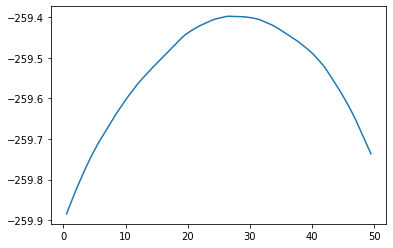

In [435]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/2)
    lml=Lasso(alpha=i/2)
    error.append(np.mean(cross_val_score(lml,x_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [436]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
52,26.5,-259.397421


In [438]:
# At alpha of 26.5 lasso regression gives slighty better model

In [439]:
# Random forest regression
rf=RandomForestRegressor()
np.mean(cross_val_score(rf,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-162.76172916926274

In [440]:
# Tune models using grid search
parameters={'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

In [441]:
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [442]:
gs.best_score_

-151.4412369088569

In [443]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [475]:
# test ensembles
tpred_lm=lm.predict(x_test)
tpred_lml=lm_l.predict(x_test)
tpred_rf=gs.best_estimator_.predict(x_test)

array([ 659.02116667,  655.98833333,  447.2335    , 1681.95      ,
        483.33333333,  871.31866667,  994.75      , 1737.67333333,
        202.5       ,  656.349     ,  834.23333333,  739.94666667,
        124.25      ,  669.9985    ,  418.05516667,  902.35983333,
       1200.53283333,  631.13783333, 1338.78883333, 1609.91666667,
        333.71583333, 1870.75      ,  393.24166667,  267.992     ,
        671.62766667,  367.98883333,  218.37783333,  760.00566667,
       1192.1545    ,  292.65583333,  421.31933333, 1577.13716667,
       1102.34966667,  391.54266667, 1721.25      ,  660.44266667,
        838.73333333, 1677.7       ,  448.08183333,  965.2       ,
       1267.1655    ,  627.43983333,  160.76      ,  492.84183333,
       2816.6       , 2484.54616667, 2485.55933333,  486.17433333,
        576.4735    ,  867.55616667,  153.26383333,  455.        ,
        342.87566667,  492.84183333,  458.94283333, 2380.93333333,
       2100.        ,  416.49883333,  775.6565    , 2289.2575 

In [445]:
mean_absolute_error(y_test,tpred_lm)

275.35076180906026

In [446]:
mean_absolute_error(y_test,tpred_lml)

274.19114611830935

In [447]:
mean_absolute_error(y_test,tpred_rf)

118.5506867219917

### Test data only for the competition

In [458]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/auction_data/test_set_label.csv')
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0
1,1644343468,111.11,0.587164,tab999@msn.com,84,1.0
2,1639979107,103.50,6.999572,inyerdrms,2,5.0
3,1649718196,620.00,2.750775,kjr2306,24,1.0
4,1644077820,60.00,1.393611,chevysred,-1,1.0


In [459]:
test_data.shape

(337, 6)

In [460]:
test_data.isnull().any()

auctionid     False
bid           False
bidtime       False
bidder        False
bidderrate    False
openbid       False
dtype: bool

In [461]:
test_data.dtypes

auctionid       int64
bid           float64
bidtime       float64
bidder         object
bidderrate      int64
openbid       float64
dtype: object

In [462]:
# Removing email ids from bidder's name
test_data['bidder']=test_data['bidder'].apply(lambda x:x.split('@')[0] if '@' in x else x)
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0
1,1644343468,111.11,0.587164,tab999,84,1.0
2,1639979107,103.50,6.999572,inyerdrms,2,5.0
3,1649718196,620.00,2.750775,kjr2306,24,1.0
4,1644077820,60.00,1.393611,chevysred,-1,1.0


In [463]:
test_data['user_len']=test_data['bidder'].apply(lambda x:len(x))
test_data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,user_len
0,1640550476,175.00,4.329410,simonho2001sg,8,1.0,13
1,1644343468,111.11,0.587164,tab999,84,1.0,6
2,1639979107,103.50,6.999572,inyerdrms,2,5.0,9
3,1649718196,620.00,2.750775,kjr2306,24,1.0,7
4,1644077820,60.00,1.393611,chevysred,-1,1.0,9


In [464]:
test_x=test_data[['auctionid', 'bid', 'bidtime', 'bidderrate', 'openbid','user_len']]

In [465]:
pred_lm=lm.predict(test_x)
pred_lml=lm_l.predict(test_x)
pred_rf=gs.best_estimator_.predict(test_x)

In [466]:
pred_rf=pd.DataFrame(pred_rf)

In [467]:
pred_rf.shape

(337, 1)

In [468]:
pred_rf.to_csv('pred_rf.csv')